In [70]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/16H8sQIBO77wYOB-ZFuKform-FFJfQKL4
"""
##Chamada no Power BI
#from simulacao_venda import simulacao_venda 

#simulacao_venda(dataset)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
    
def simulacao_venda(nfator):
  
    #Venda real
    #df_venda = pd.read_excel("c:\Temp\RegressaoLinear-venda.xlsx")
    df_venda = pd.read_excel("RegressaoLinear-venda.xlsx")

    y = df_venda['IMPRESSO']

    cols = ['IMPRESSO','PERIODO']
    x = df_venda.drop(cols, axis=1)

    #Predição com indicadores
    #df_pred = pd.read_excel("c:\Temp\RegressaoLinear-pred.xlsx")
    df_pred = pd.read_excel("RegressaoLinear-pred.xlsx")

    cols = ['PERIODO']
    df_pred.drop(cols, axis=1,inplace=True)

    # x_pred => Predição calculada
    x_pred = df_pred.copy()
    
    # x_simula => Simulação conforme mudança de valores no dashboad
    x_simula = df_pred.copy()

    #Altera valores conforme simulação no dashboad
    x_simula.MB = x_simula.MB* (100 + nfator['Simulador_MB Valor'][0])/100
    x_simula.EBOOK = x_simula.EBOOK* (100 + nfator['Simulador_Ebook Valor'][0])/100
    
    # define the multiple Linear regression model
    linear_regress = LinearRegression()

    #Fit conforme vendas reais
    linear_regress.fit(x,y)

    #Predição calculada
    y_pred = linear_regress.predict(x_pred)
    y_pred = pd.DataFrame(y_pred).rename(columns={0:"Impresso"})

    #Predição simulada com parametros alterados no dashboard
    y_simula = linear_regress.predict(x_simula)
    y_simula = pd.DataFrame(y_simula).rename(columns={0:"Impresso"}).round(0)

    #Predicao final
    predicao = {'Formato':['EBOOK','MB','IMPRESSO'],
                  'Predicao': [x_pred['EBOOK'].sum().round(2) ,x_pred['MB'].sum().round(2) ,y_pred['Impresso'].sum().round(2)],
                  'Simulacao': [x_simula['EBOOK'].sum().round(2) ,x_simula['MB'].sum().round(2) ,y_simula['Impresso'].sum().round(2)]}

    predicao = pd.DataFrame(predicao,columns=['Formato','Predicao','Simulacao'])

    receita = {'Formato':['Total'],
                  'Predicao': [predicao['Predicao'].sum().round(2)],
                  'Simulacao': [predicao['Simulacao'].sum().round(2)]}


    receita = pd.DataFrame(receita,columns=['Formato','Predicao','Simulacao'])

    #Gera gráfico  
    figure, axes = plt.subplots(2, 1, figsize=(25,15))

    predicao.plot(ax=axes[0], kind='bar', grid=True, x='Formato')
    receita.plot(ax=axes[1], kind='bar', grid=True, x='Formato')

    figure.tight_layout()
    figure.show()

    plt.show()

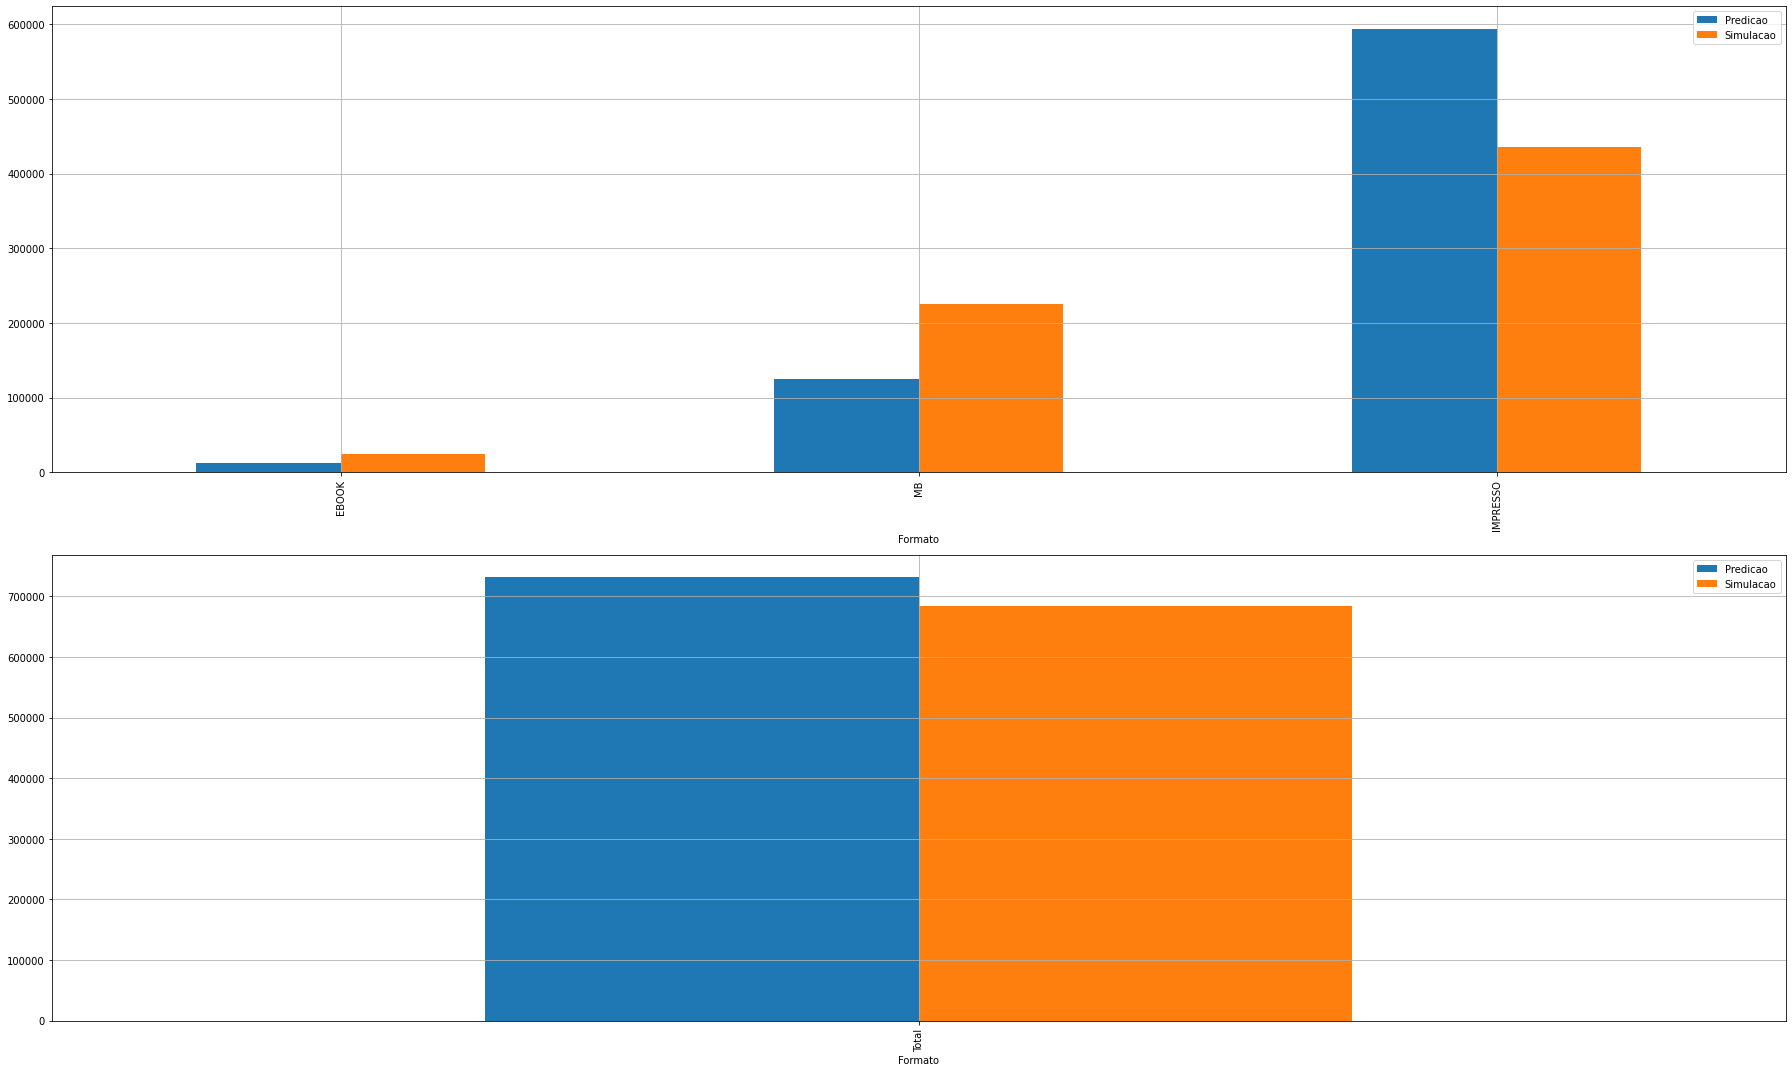

In [71]:
# Create the pandas DataFrame
df_parm = pd.DataFrame([[80,90]],columns=['Simulador_MB Valor','Simulador_Ebook Valor'])


simulacao_venda(df_parm)

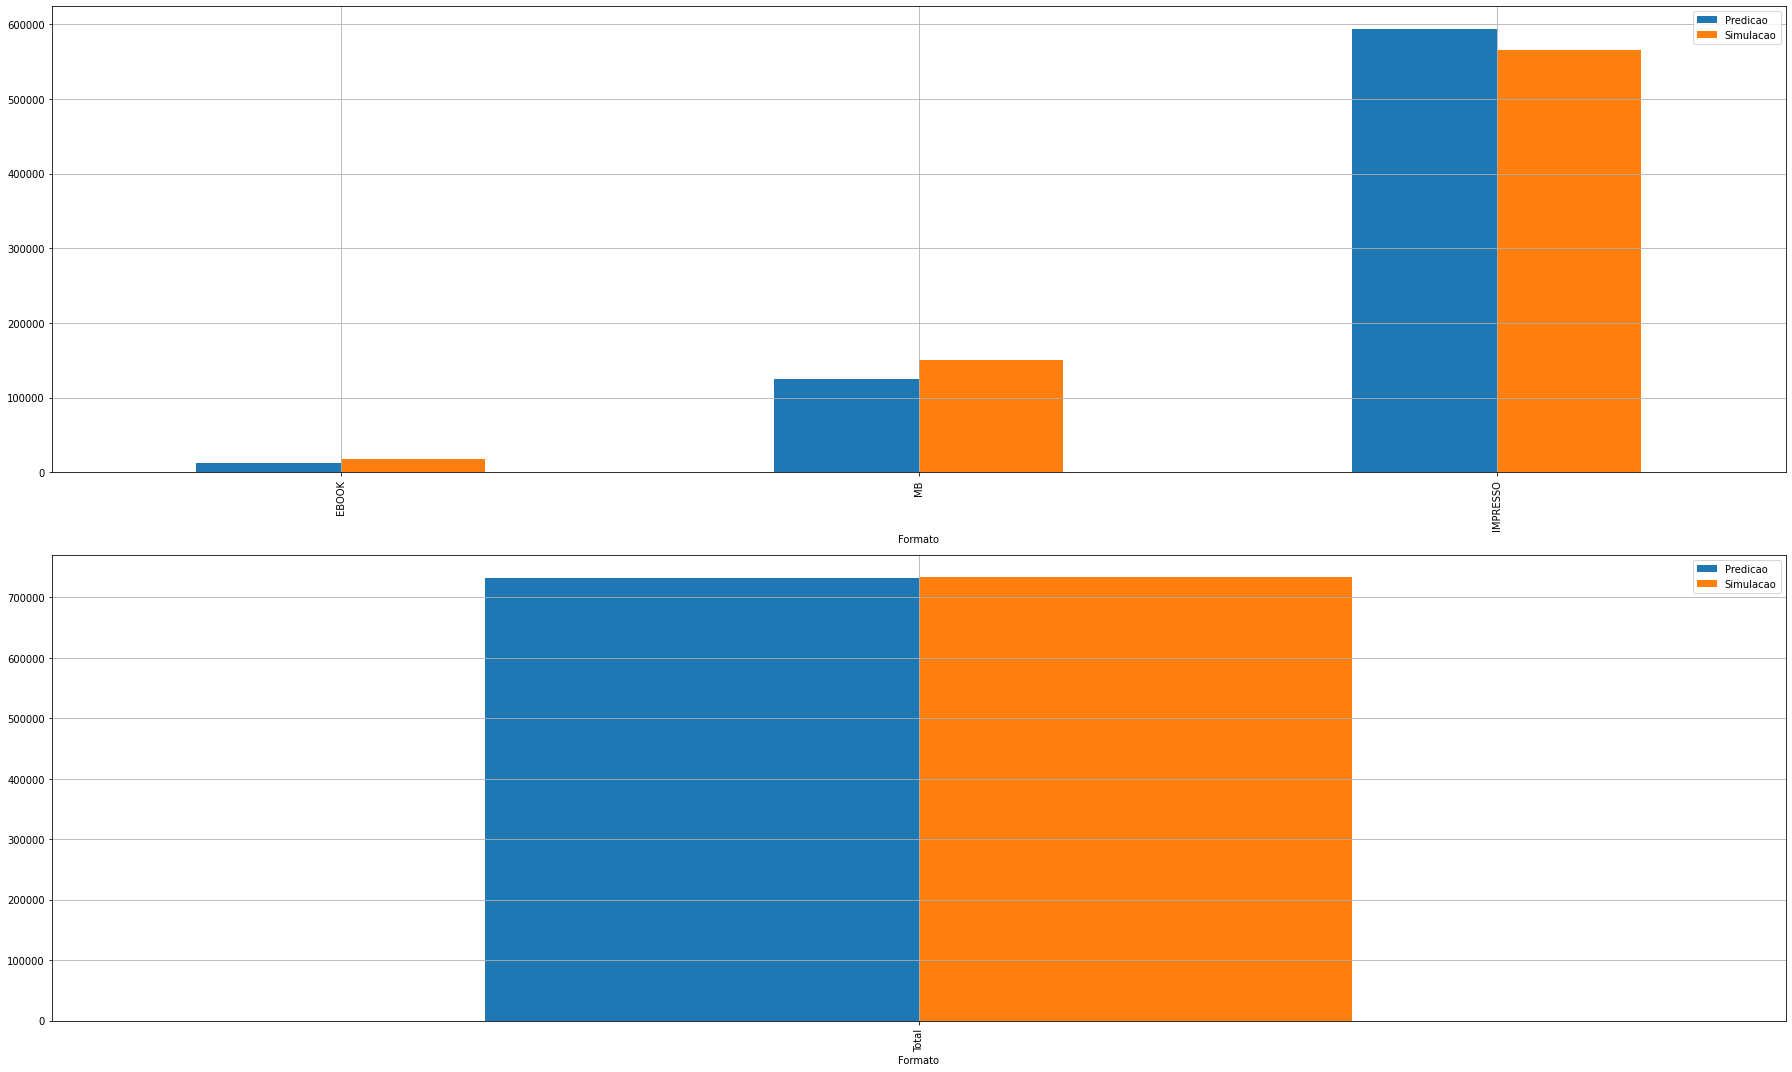

In [69]:
#Venda real
#df_venda = pd.read_excel("c:\Temp\RegressaoLinear-venda.xlsx")
df_venda = pd.read_excel("RegressaoLinear-venda.xlsx")

y = df_venda['IMPRESSO']

cols = ['IMPRESSO','PERIODO']
x = df_venda.drop(cols, axis=1)

#Predição com indicadores
#df_pred = pd.read_excel("c:\Temp\RegressaoLinear-pred.xlsx")
df_pred = pd.read_excel("RegressaoLinear-pred.xlsx")

cols = ['PERIODO']
df_pred.drop(cols, axis=1,inplace=True)

# x_pred => Predição calculada
x_pred = df_pred.copy()

# x_simula => Simulação conforme mudança de valores no dashboad
x_simula = df_pred.copy()

#Altera valores conforme simulação no dashboad
x_simula.MB = x_simula.MB* 1.2 #(100 + nfator['Simulador_MB Valor'][0])/100
x_simula.EBOOK = x_simula.EBOOK* 1.4 #(100 + nfator['Simulador_Ebook Valor'][0])/100

# define the multiple Linear regression model
linear_regress = LinearRegression()

#Fit conforme vendas reais
linear_regress.fit(x,y)

#Predição calculada
y_pred = linear_regress.predict(x_pred)
y_pred = pd.DataFrame(y_pred).rename(columns={0:"Impresso"})

forecast_pred = pd.concat([x_pred,pd.DataFrame(y_pred)],axis=1).round(0)

#Predição simulada
y_simula = linear_regress.predict(x_simula)
y_simula = pd.DataFrame(y_simula).rename(columns={0:"Impresso"}).round(0)

forecast_simula = pd.concat([x_simula,pd.DataFrame(y_simula)],axis=1)
  
#Predicao final
predicao = {'Formato':['EBOOK','MB','IMPRESSO'],
              'Predicao': [x_pred['EBOOK'].sum().round(2) ,x_pred['MB'].sum().round(2) ,y_pred['Impresso'].sum().round(2)],
              'Simulacao': [x_simula['EBOOK'].sum().round(2) ,x_simula['MB'].sum().round(2) ,y_simula['Impresso'].sum().round(2)]}

predicao = pd.DataFrame(predicao,columns=['Formato','Predicao','Simulacao'])

receita = {'Formato':['Total'],
              'Predicao': [predicao['Predicao'].sum().round(2)],
              'Simulacao': [predicao['Simulacao'].sum().round(2)]}


receita = pd.DataFrame(receita,columns=['Formato','Predicao','Simulacao'])

#Gera gráfico  
figure, axes = plt.subplots(2, 1, figsize=(25,15))

predicao.plot(ax=axes[0], kind='bar', grid=True, x='Formato')
receita.plot(ax=axes[1], kind='bar', grid=True, x='Formato')

figure.tight_layout()
figure.show()

plt.show()

In [43]:
x_simula

,EBOOK,MB
0,2883.553608,34210.467167
1,2078.224839,32849.320479
2,2718.348648,41236.403681
3,9967.978314,42026.838014


In [42]:
y_simula

,Impresso
0,141040.0
1,139990.0
2,125200.0
3,159174.0


In [60]:
predicao = {'Formato':['EBOOK','MB','IMPRESSO'],
              'Predicao': [x_pred['EBOOK'].sum().round(2) ,x_pred['MB'].sum().round(2) ,y_pred['Impresso'].sum().round(2)],
              'Simulacao': [x_simula['EBOOK'].sum().round(2) ,x_simula['MB'].sum().round(2) ,y_simula['Impresso'].sum().round(2)]}

predicao = pd.DataFrame(predicao,columns=['Formato','Predicao','Simulacao'])

predicao

,Formato,Predicao,Simulacao
0,EBOOK,12605.79,17648.11
1,MB,125269.19,150323.03
2,IMPRESSO,594183.77,565404.00


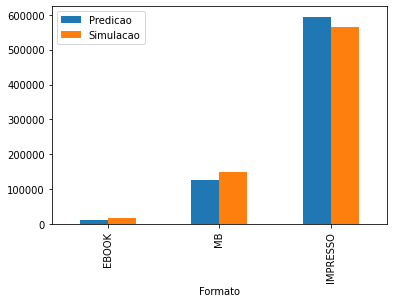

In [50]:
predicao.plot(kind='bar',x='Formato')

In [55]:
total_pred = {'Formato':['Total'],
              'Predicao': [predicao['Predicao'].sum().round(2)],
              'Simulacao': [predicao['Simulacao'].sum().round(2)]}


receita = pd.DataFrame(total_pred,columns=['Formato','Predicao','Simulacao'])

In [59]:
print(receita)

  Formato   Predicao  Simulacao
0   Total  732058.75  733375.14
